In [1]:
import os
os.getcwd()

'C:\\Users\\epicr\\Desktop\\CPSC 103 Project'

# Project Final Submission 

### Step 1a: Planning 
#### Identify the information in the file your program will read


The following datset is taken from the CPSC103 sample datsets. All information within the dataset is updated to September 23, 2016 and does not reflect 26 Mar 2021.

There are 4 columns in the dataset: `country`, `unemployment_rate`, 
`gdp_per_cap`, `gov_type`, and `population`  

- `country` represents the dataset of a specific nation within the continents of North and South America, Africa, Europe, and Asia



- `unemployment_rate` represents the unemployment rate (in percentage) of people in the specific `country`



- `gdp_per_cap` represents the gross domestic product per capita (per person) within the specific `country`



- `gov_type` represents the type of governance the `country` is in. It is to note that some `gov_type` vaalues contain 'n/a' values stored as a string. Nevertheless, the following government types are available:
    - Republic
    - Constitutional Monarchy
    - Absolute Monarchy
    - Communist State  
    
        



- `population` represents the amount of people within the `country`



### Step 1b: Planning 
#### Brainstorm ideas for what your program will produce
#### Select the idea you will build on for subsequent steps


The are possible program outputs within this dataset:
- A bar chart showing all types of government on the x-axis and the average unemplyoment rate of each government type on the y-axis


- A bar chart showing all types of government on the x-axis and the population of people on the y-axis


- A scatterplot which shows the relationship between unemployment rate on the x-axis and GDP Per Capital on the y-axis


- A bar chart showing showing the type of government on the x-axis and the average population on the y-axis


- A bar plot showing the unemployment rates of North and South America with countries grouped together that correspond to their respective continents

For the sake of this project, I will chose ***A bar chart showing all types of government on the x-axis and the average unemplyoment rate of each government type on the y-axis***




In [2]:
from cs103 import *
from typing import NamedTuple, List
from enum import Enum
import csv
import matplotlib.pyplot as plt
##################
# Data Definitions

GovType =  Enum('GovType', ['republic', 'constitutional_monarchy', 'absolute_monarchy', 'communist_state','n_a'])
# interp. a  government type that is either a Republic (republic), a Constitutional Monarchy (constitutional_monarchy), 
# an Absolute Monarchy (absolute_monarchy),a Communist State (communist_state) or a government type that is not listed (n_a)

# examples are redundant for enumerations

@typecheck
# template based on enumeration (5 cases)
def fn_for_gov_type(gt: GovType) -> ...:
    if gt == GovType.republic:
        return ...
    elif gt == GovType.constitutional_monarchy:
        return ...
    elif gt == GovType.absolute_monarchy:
        return ...
    elif gt == GovType.communist_state:
        return...
    elif gt == GovType.n_a:
        return...
    
GovernmentData = NamedTuple('GovernmentData', [('govt_type', GovType),
                                 ('unemployment_rate', float)])    # in range[0,...]

#interp a country's government type (govt_type) and unemployment rate (unemployment_rate) in percentage (%)

GD1 = GovernmentData(GovType.republic, 19.3)
GD2 = GovernmentData(GovType.republic, 11.2)
GD3 = GovernmentData(GovType.constitutional_monarchy, 11.0)
GD4 = GovernmentData(GovType.republic, 18.5)


GD5= GovernmentData(GovType.n_a, 13.0)
GD6 = GovernmentData(GovType.republic, 9.2)
GD7 = GovernmentData(GovType.constitutional_monarchy, 6.5)
GD8 = GovernmentData(GovType.republic, 24.0)
GD9 = GovernmentData(GovType.absolute_monarchy, 2.7)
GD10 = GovernmentData(GovType.communist_state, 4.1)


@typecheck
def fn_for_government_data(gd: GovernmentData) -> ...: # template based on Compound and reference rule
    return ...(fn_for_gov_type(gd.gov_type),
               gd.unemployment_rate)


# List[GovernmentData]
# interp. a list of GovernmentData
LOC0 = []
LOC1= [GD1, GD2, GD3, GD4]
LOC2= [GD6, GD7, GD8, GD9,GD10]


@typecheck
def fn_for_logd(logd: List[GovernmentData]) -> ...: #template based on arbitrary sized and reference rule
    # description of the accumulator
    acc = ...      # type: ...
    for gd in loc:
        acc = ...(fn_for_government_data(gd), acc)

    return ...(acc)



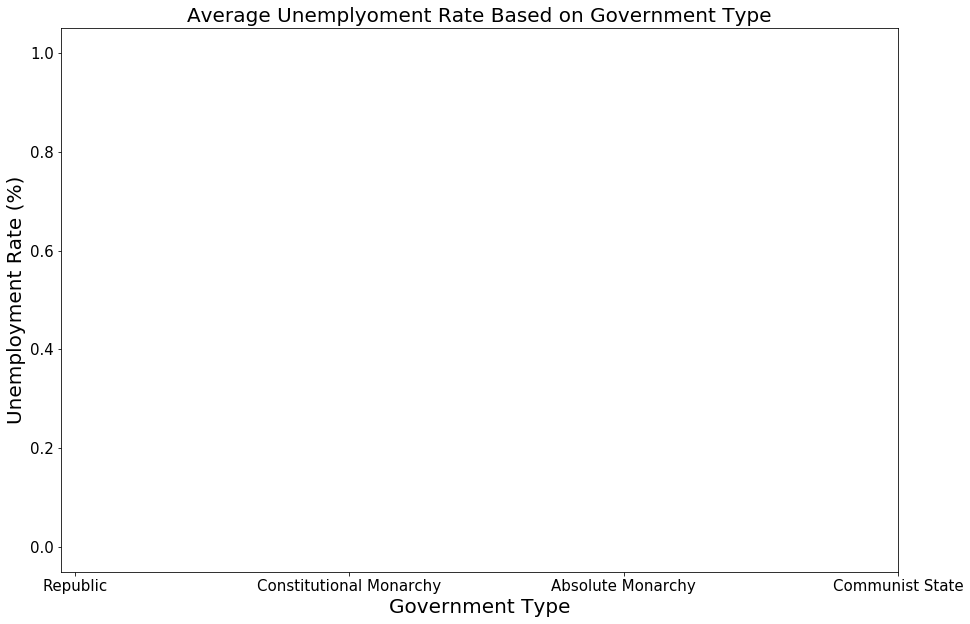

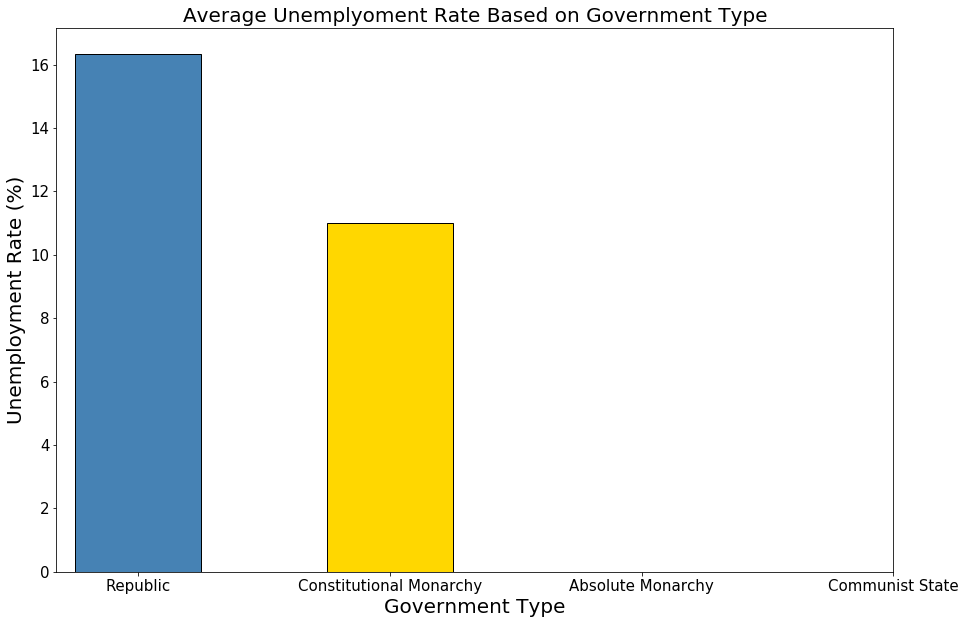

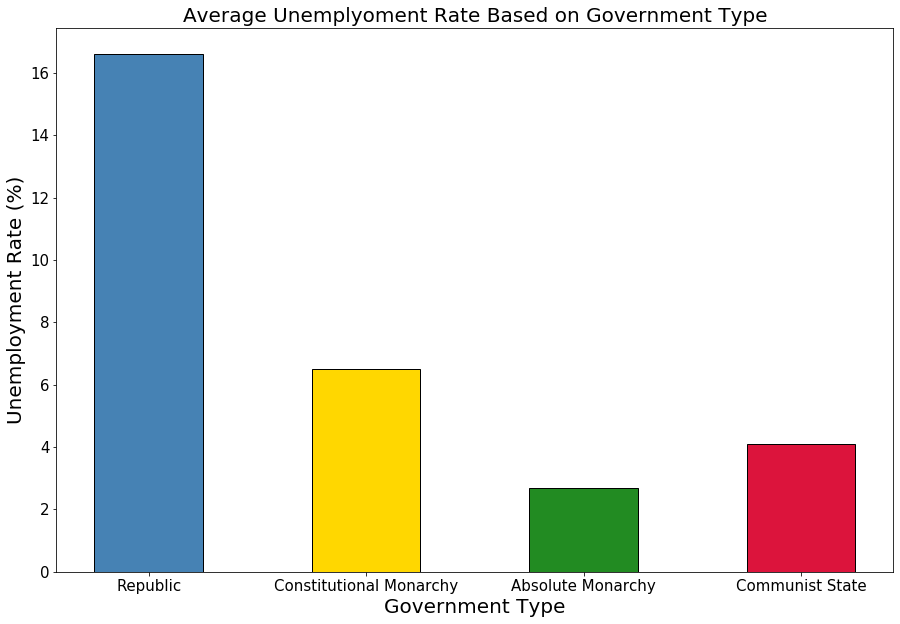

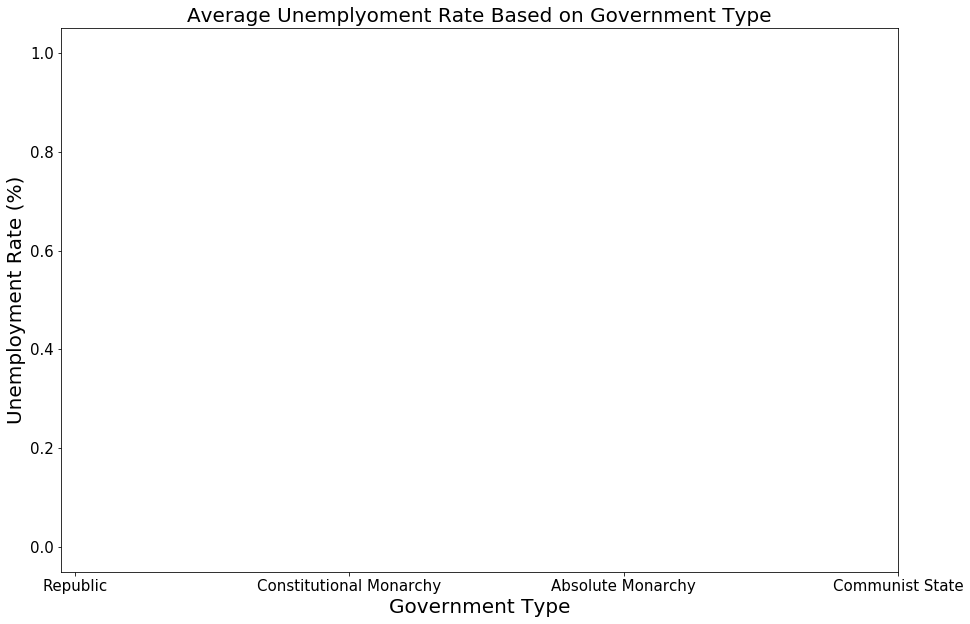

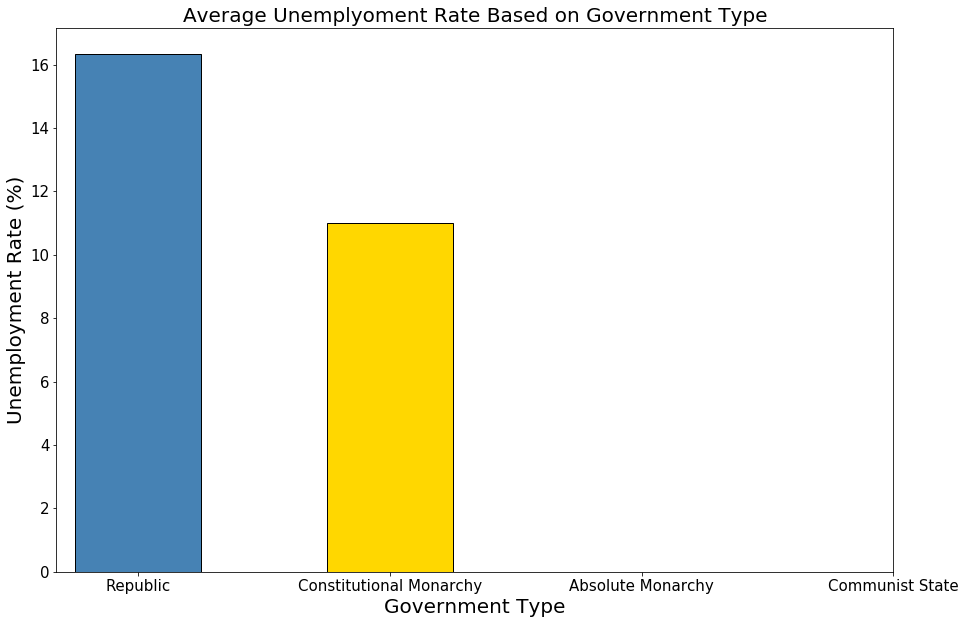

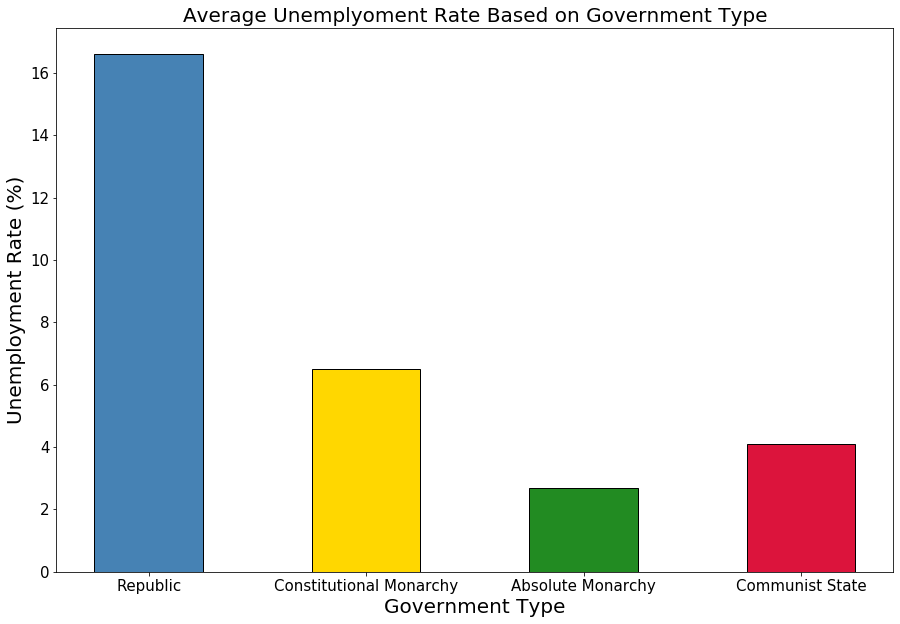

47 of 47 tests passed


In [3]:
###########
# Functions

@typecheck
def main(filename: str) -> None:
    """
    Reads the information from given filename and displays the following information in a bar chart:
    the x-axis will show the government types: Republic (in blue), Constitutional Monarchy(yellow), Absolute  Monarchy
    (in green), and Communist State (in red) in this exact order. 
    The y axis will show the unemployment rate in percentage (%). 
    The title will be: Average Unemplyoment Rate Based on Government Type
    """
#     return None #stub
    # Template from HtDAP, based on composition
    return analyze(read(filename))


@typecheck
def read(filename: str) -> List[GovernmentData]:
    """    
    reads information from the specified file and returns the list of GovernmentData specifically the 
    government type and unepmloyment rate in percentage(%)
    """
    #return []  #stub
    # Template from HtDAP
    # loc contains the result so far
    logd = [] # type: List[UnemploymentData]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            # you may not need to store all the rows, and you may need
            # to convert some of the strings to other types
            gd = GovernmentData(parse_govtype(row[4]), parse_float(row[2]))
            logd.append(gd)
            
        filtered_na_govt_type= drop_na_values(logd)
    
    return filtered_na_govt_type

@typecheck
def analyze(logd: List[GovernmentData]) -> None:
    """
    display a bar chart showing the average unemployment rate by government type
    government types are only for Republic, Constitutional Monarchy, Absolute Monarchy, 
    and Communist State government types.
    """
    # return None #stub
    # Template based on visualization
    #find unemployment rates for each type of government
    
    gov_unemployment_rate= get_num_unemployment(logd)

    #Labels for the x axis. The number of tickvalues also need to correspond the number of labels made
    gov_labels = ['Republic', 'Constitutional Monarchy', 'Absolute Monarchy', 'Communist State']
    tickvalues= range(0,len(gov_labels))

    
    #make the chart bigger
    plt.figure(figsize=(15,10))
    
    
    #make bar chart
    plt.bar(range(len(gov_unemployment_rate)),gov_unemployment_rate, width= 0.5,
            color= ['steelblue','gold','forestgreen','crimson'], edgecolor='black')
    
    #formatting the x and y labels of the bar chart
    plt.xlabel('Government Type', fontsize=20)
    plt.ylabel('Unemployment Rate (%)', fontsize=20)
    
    #modifying tick names and size
    plt.xticks(tickvalues,gov_labels,fontsize=15)
    plt.yticks(fontsize=15)
    
    #creating the title
    plt.title('Average Unemplyoment Rate Based on Government Type', fontsize=20)
    
    #show the bar chart 
    plt.show()
    return
    


@typecheck
def parse_govtype(s: str)-> GovType: 
    """
   Given a string which must be one of "Republic",
    "Absolute monarchy", "Constitutional monarchy", 'Communist state' and 
    "n/a", returns the corresponding GovType.
    """
#     return GovType.republic #stub
    #return ...(s) # template from atomic non-distinct
    if s == "Republic":
        return GovType.republic
    elif s == "Absolute monarchy":
        return GovType.absolute_monarchy
    elif s == "Constitutional monarchy":
        return GovType.constitutional_monarchy
    elif s == "Communist state":
        return GovType.communist_state
    elif s== 'n/a':
        return GovType.n_a
    

@typecheck
def drop_na_values(logd:List[GovernmentData])-> List[GovernmentData]:
    """
    given a List[GovernmentData], return those Country without GovType.n_a
    """
#     return [] #stub
    #template copied from List[GovernmentData]
    # acc stores the list of Country that does not have GovType.n_a thus far
    acc = []      # type: List[GovernmentData]
    for gd in logd:
        if check_null_gov_type(gd):
            acc.append(gd)
    return acc


@typecheck
def check_null_gov_type(gd: GovernmentData)-> bool:
    """
    return True if government type in GovernmentData does not equal to GovType._na in GovType
    """
#     return True #stub
    #template copied from atomic non distinct
    return gd.govt_type != GovType.n_a




@typecheck
def get_num_unemployment(logd:List[GovernmentData])-> List[float]:
    """
    return the number of unemployment rates in percentage (%) from lou
    """
#     return [] #stub
#     template from arbitrary sized 
    republic_unepmloyment_rate= avg_republic_unepmloyment_rate(logd)
    cons_monarchy_unepmloyment_rate= avg_cons_monarchy_unepmloyment_rate(logd)
    abs_monarchy_unepmloyment_rate= avg_abs_monarchy_unepmloyment_rate(logd)
    comm_state_unepmloyment_rate= avg_comm_state_unemployment_rate(logd)
    list_of_unemployment= [republic_unepmloyment_rate, cons_monarchy_unepmloyment_rate, 
                                    abs_monarchy_unepmloyment_rate,
                                    comm_state_unepmloyment_rate]
    list_of_unemployment= remove_zeros(list_of_unemployment)
    return list_of_unemployment


    

@typecheck
def avg_republic_unepmloyment_rate(logd:List[GovernmentData])-> float:
    """
    given a List[GovernmentData], return the average of the unemployment rate for the republic 
    government type in a form of a float
    """
#     return 0.0 #stub
     #template copied from one-of
    #  acc stores the unemployment rate of the republic government type seen so far  
    acc = []      # type: List[GovernmentData]
    for gd in logd:
        if gd.govt_type == GovType.republic:
            acc.append(gd.unemployment_rate)
    
    return get_average(acc)



@typecheck
def avg_cons_monarchy_unepmloyment_rate(logd:List[GovernmentData])-> float:
    """
    given a List[GovernmentData], return the average of the unemployment rate for the constitutional monarchy
    government type in a form of a float
    """
#     return 0.0 #stub
     #template copied from one-of
    # acc stores the unemployment rate of the consitutional monarchy governments seen so far  
    acc = []      # type: List[GovernmentData]
    for gd in logd:
        if gd.govt_type == GovType.constitutional_monarchy:
            acc.append(gd.unemployment_rate)
    
    return get_average(acc)

@typecheck
def avg_abs_monarchy_unepmloyment_rate(logd:List[GovernmentData])-> float:
    """
    given a List[GovernmentData], return the average of the unemployment rate for the absolute monarchy
    government type in a form of a float
    """
#     return 0.0 #stub
     #template copied from one-of
    # acc stores the unemployment rate of the absolute monarchy governments seen so far  
    acc = []      # type: List[GovernmentData]
    for gd in logd:
        if gd.govt_type == GovType.absolute_monarchy:
            acc.append(gd.unemployment_rate)
    
    return get_average(acc)


@typecheck
def avg_comm_state_unemployment_rate(logd:List[GovernmentData])-> float:
    """
    given a List[GovernmentData], return the average of the unemployment rate for the communist state
    government type in a form of a float
    """
#     return 0.0 #stub
     #template copied from one-of
    # acc stores the unemployment rate of the communist state governments seen so far  
    acc = []      # type: List[GovernmentData]
    for gd in logd:
        if gd.govt_type == GovType.communist_state:
            acc.append(gd.unemployment_rate)
    
    return get_average(acc)

@typecheck
def get_average(lof: List[float])->float:
    """
    given a list of floats, return the average value of the list of floats. the average value is rounded
    to two decimal places
    """
#     return 0.00 #stub
#     template based on atomic non-distinct
    if lof== []:
        return 0
    else:    
        sum_of_list= get_sum(lof)
        length= get_length(lof)
        average= sum_of_list/length
        rounded_average= round(average,2)
    return rounded_average



@typecheck
def get_sum(lof:List[float])->float:
    """
    return the sum of the numbers in a given list
    """
#     return 0.0 #stub
    #template based on atomic non distinct
    sum_list= sum(lof)
    return sum_list
    


@typecheck
def get_length(lof:List[float])->int:
    """
    return the length of the list
    """
#     return 0 #stub
    #template based on atomic non distinct
    length= len(lof)
    return length


@typecheck
def remove_zeros(lof:List[float])-> List[float]:
    """
    remove zeros from a list of floats
    """
#     return [] #stub
    #template based on arbitrary sized
    #acc stores the non-zero list of floats seen so far
    acc= [] #type List[float]
    for f in lof:
        if f!=0.0:
            acc.append(f)
    return acc
            



    
# Begin testing
start_testing()

#Examples and test for main
#produce a blank graph with Government Type on x axis and Unemployment rate on y axis. With a Title and x and y labels
expect(main('testfile_empty.csv'), None)
       
# See the 1st sketch in the markdown cell below for what we expect this to look like along with the labels from blank example       
expect(main('country_per_cap_gdp_unemployment_gov_type_pop-test-1.csv'), None)
       
# See the 2nd sketch in the markdown cell below for what we expect this to look like along with the labels from blank example   
expect(main('country_per_cap_gdp_unemployment_gov_type_pop-test-2.csv'), None)

# Examples and tests for read
expect(read('testfile_empty.csv'), [])
expect(read('country_per_cap_gdp_unemployment_gov_type_pop-test-1.csv'), LOC1)
expect(read('country_per_cap_gdp_unemployment_gov_type_pop-test-2.csv'), LOC2)

#Examples and tests for analyze
#produce a blank graph with Government Type on x axis and Unemployment rate on y axis. With a Title and x and y labels
expect(analyze([]), None) 

# See the 1st sketch in the markdown cell below for what we expect this to look like along with the labels from blank example
expect(analyze(LOC1), None)

# See the 2nd sketch in the markdown cell below for what we expect this to look like along with the labels from blank example
expect(analyze(LOC2), None)


# Examples and tests for parse_govtype
expect(parse_govtype('Republic'),GovType.republic)
expect(parse_govtype('Absolute monarchy'),GovType.absolute_monarchy)
expect(parse_govtype('Constitutional monarchy'),GovType.constitutional_monarchy)
expect(parse_govtype('Communist state'),GovType.communist_state)
expect(parse_govtype('n/a'),GovType.n_a)

# Examples and tests for drop_na_values
expect(drop_na_values([]),[])
expect(drop_na_values(LOC1),[GD1, GD2, GD3, GD4])
expect(drop_na_values(LOC2),[GD6,GD7,GD8,GD9,GD10])


# Examples and tests for check_null
expect(check_null_gov_type(GD5), False)
expect(check_null_gov_type(GD1), True)
expect(check_null_gov_type(GD7), True)


#examples and tests for get_num_unemployment
expect(get_num_unemployment([]),[])
expect(get_num_unemployment(LOC1),[16.33, 11.0])
expect(get_num_unemployment(LOC2),[16.6, 6.5, 2.7, 4.1,])


# Examples and tests for avg_republic_unepmloyment_rate
expect(avg_republic_unepmloyment_rate([]),0)
expect(avg_republic_unepmloyment_rate([GD1,GD2,GD6]),13.23)
expect(avg_republic_unepmloyment_rate([GD6,GD8]),16.6)


# Examples and tests for abs_cons_monarchy_unepmloyment_rate
expect(avg_cons_monarchy_unepmloyment_rate([]),0)
expect(avg_cons_monarchy_unepmloyment_rate([GD3,GD7]),8.75)
expect(avg_cons_monarchy_unepmloyment_rate([GD7, GovernmentData(GovType.constitutional_monarchy, 4.3)]),5.4)


# Examples and tests for abs_monarchy_unepmloyment_rate
expect(avg_abs_monarchy_unepmloyment_rate([]),0)
expect(avg_abs_monarchy_unepmloyment_rate([GD9,GovernmentData(GovType.absolute_monarchy, 6.4)]),4.55)
expect(avg_abs_monarchy_unepmloyment_rate([GovernmentData(GovType.absolute_monarchy, 6.4),
                                       GovernmentData(GovType.absolute_monarchy, 2.3)]),4.35)


# Examples and tests for comm_state_unemployment_rate

expect(avg_comm_state_unemployment_rate([]),0)
expect(avg_comm_state_unemployment_rate([GD10,GovernmentData(GovType.communist_state, 32.3)]),18.2)
expect(avg_comm_state_unemployment_rate([GovernmentData(GovType.communist_state, 19.32),
                                       GovernmentData(GovType.communist_state, 14.97)]),17.14)


# Examples and tests for get_average
expect(get_average([]),0.0)
expect(get_average([2.5,6.4,5.2]),4.7)
expect(get_average([2.0,5.0,3.0]),3.33)

# Examples and tests for get_sum
expect(get_sum([]),0.0)
expect(get_sum([2.5,6.4,5.2]),14.1)
expect(get_sum([2.0,5.0,3.0]),10.0)


# Examples and tests for get_length
expect(get_length([]),0)
expect(get_length([2.5,6.4,5.2]),3)
expect(get_length([2.0,5.0,3.0,3.25]),4)



#examples and tests for remove_zeroes:
expect(remove_zeros([1.3,0.0,3.3]),[1.3,3.3])
expect(remove_zeros([2.5,1.3,0]),[2.5,1.3])
expect(remove_zeros([0,1.3,3.2]),[1.3,3.2])


# show testing summary
summary()

Example should look like this
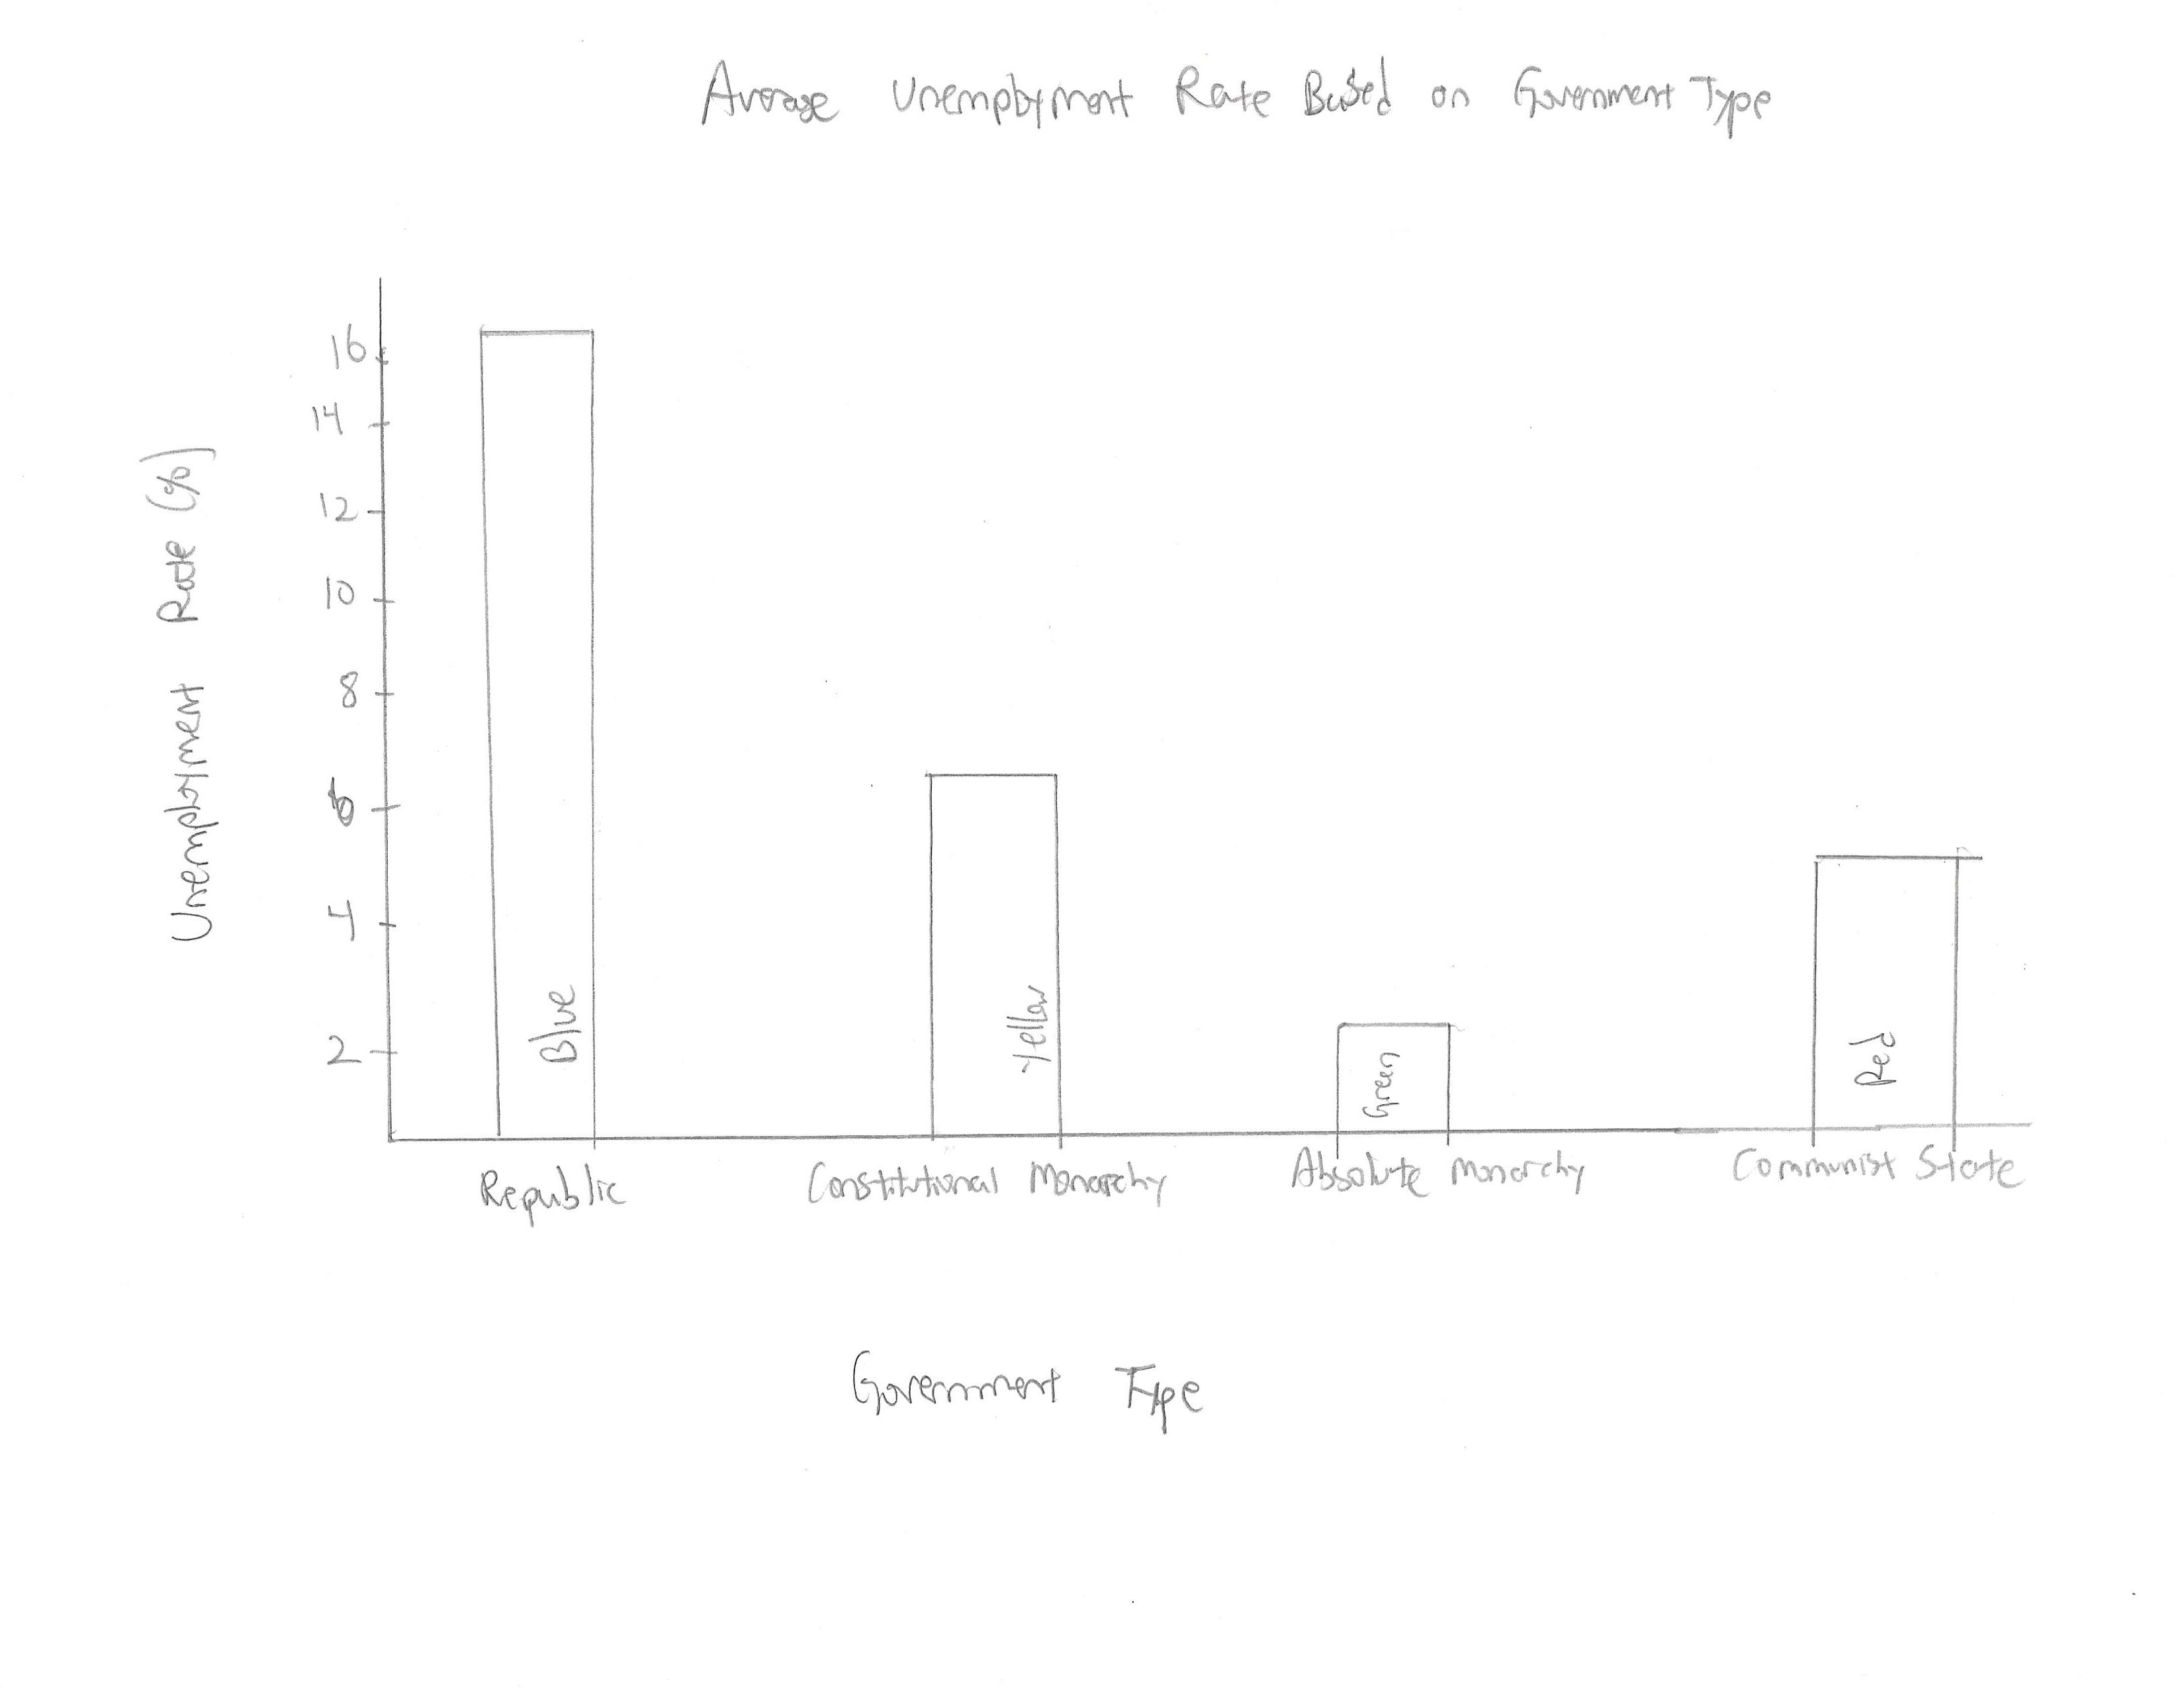

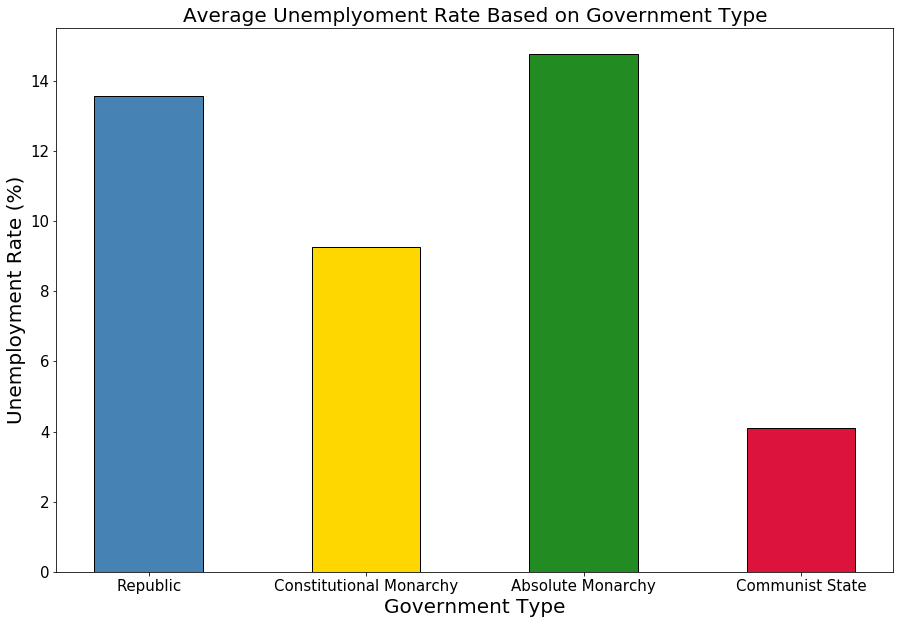

In [5]:
main('country_per_cap_gdp_unemployment_gov_type_pop.csv')